In [1]:
from glob import glob
import numpy as np
import pyabf
import matplotlib.pyplot as plt
from open_abf import plot_swps, get_sweeps, swp_window
from scipy.optimize import leastsq
import functions as func
%matplotlib widget

In [2]:
pathToData = "/home/alan/Documents/LAB/CSHL/Data/"
folders = glob(pathToData+"*")
folders

['/home/alan/Documents/LAB/CSHL/Data/Nav']

In [3]:
files = glob(folders[0]+"/*")
files

['/home/alan/Documents/LAB/CSHL/Data/Nav/24607007_reco-100.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Nav/24607005_IV.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Nav/24607010_reco-110.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Nav/24607008-reco-90.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Nav/24607006_inact.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Nav/24607020_IV2.abf']

## Activation
### IV curve 

In [4]:
iv_files = glob(folders[0]+"/*IV*")
iv_files

['/home/alan/Documents/LAB/CSHL/Data/Nav/24607005_IV.abf',
 '/home/alan/Documents/LAB/CSHL/Data/Nav/24607020_IV2.abf']

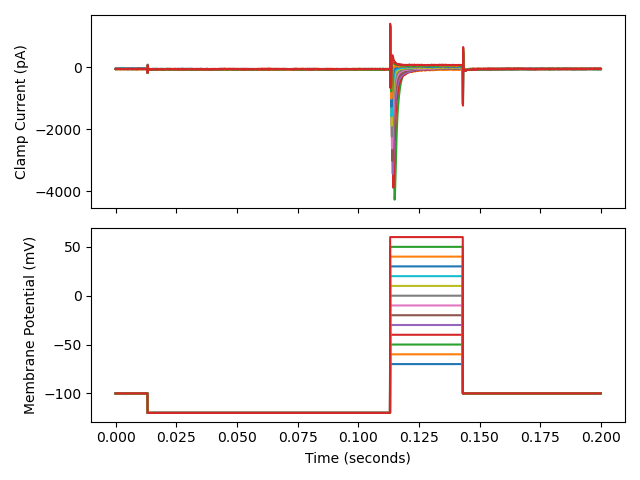

In [5]:
plt.close('all')
f = iv_files[0]
plot_swps(f)

In [ ]:
## The mean on your voltage step:
v_start = 1
v_end = 5
voltage_step = np.mean(swp_window(swps,v_start,v_end,sr,channel=1),axis=1)
## the pic response in your current:
i_start = 1
i_end = 5
current_response = np.max(swp_window(swps,i_start,i_end,sr,channel=0),axis=1)
## Create a figure plot with this line:
fig,ax = plt.subplots()
## the ax.plot(x,y,'line, dot,...') will plot your data to the figure
ax.plot(voltage_step,current_response,'.')
ax.set_xlabel('Voltage step (mV)')
ax.set_ylabel('Current response (pA)')
plt.show()

### activation curve

In [ ]:
## reversal potential in mV
E_rev = -90 ## from the IV curve
conductance = current_response/(voltage_step - E_rev)
fig, ax = plt.subplots()
ax.plot(voltage_step,conductance)
ax.set_xlabel('Voltage step (mV)')
ax.set_ylabel('Conductance (??)')
plt.show()

#### Normalise

In [ ]:
norm = conductance/conductance.max()
fig, ax = plt.subplots()
ax.plot(voltage_step,norm)
ax.set_xlabel('Voltage step (mV)')
ax.set_ylabel('Normalise activation')
plt.show()

#### fit the activation curve

In [ ]:
def fun_boltz(x, p):
    """Fit function for growth: single exponential + offset
    p[0] : V 50
    p[1] : slope
    """
    return 1.0 - (1.0/(1.0+np.exp((x-p[0])/p[1])))

def minimize_fun(p, x, y):
    return y-fun_boltz(x, p)

v50_init = 0.0
slope_init = 1.0
x = voltage_step
y = norm
p_guess = (v50_init,slope_init)
fit_boltz = leastsq(minimize_fun, p_guess, args=(x, y),full_output=True)
fit_params = fit_boltz[0]
print(fit_boltz[0])
fit_fun = fun_boltz(x,fit_params)
ax.plot(x,fit_fun,label=f"fit\n slope={fit_params[1]}\n V50={fit_params[0]} ")
ax.legend()

### Deactivation you can do it I beleive in you :) 